In [5]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF

target = "solutions on waste and water, Improve water quality and water efficiency use, water contamination, water for human consumption, water resources".split()

#Lendo a base o arquivo CSV:
df = pd.read_csv('canada_amostra.csv')

Definindo a modelo e suas features. Para cada descrição, nós vamos computar os valores TF-IDF com no máximo 300 características mais relevantes

In [ ]:
vec = TfidfVectorizer(max_features=300, stop_words="english", max_df=0.95, min_df=2)
features = vec.fit(df.description)
features = vec.transform(df.description)

Vamos criar uma instância de NMF, "Non Negative Matrix Factorization", supondo que as features possam ser agrupadas em 20 tópicos

In [19]:
from sklearn.decomposition import NMF

n_topicos = 20 #Número de tópicos

cls = NMF(n_components=n_topicos, random_state=None)
cls.fit(features)

/home/daniel/.local/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=20)

In [21]:
target = "solutions on waste and water"
target_list = target.split(",")
cls.transform(vec.transform(target_list)).argsort(axis=1)[:,-1]

array([16])

Achando a correspondência entre tema e a melhor descrição e, consequentemente, a melhor empresa. Vamos usar o algorítmo "Próximo vizinho" (Nearest Neighbor)

In [69]:
vec = TfidfVectorizer(max_features=5000, stop_words="english", max_df=0.90, min_df=2)
features = vec.fit(df.description)
features = vec.transform(df.description)

In [70]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=20, metric='cosine')
knn.fit(features)

NearestNeighbors(metric='cosine', n_neighbors=20)

In [71]:
knn.kneighbors(features[0:1], return_distance=False)

array([[    0, 12034, 11630,  4878,  3907, 13638,  7105,  6093,  4817,
         5023,  6755,  8503,  3881,   691,  4777,  3884,  8483,   786,
        19999,  5873]])

In [564]:
target = "solutions on waste and water,Improve water quality and water efficiency use,water contamination,water for human consumption,water resources"

target_list = target.split(",")

temas = target_list#["any recommendations for good ftp sites?", "i need to clean my car"]
input_features = vec.transform(temas)

D, N = knn.kneighbors(input_features, n_neighbors=20, return_distance=True)

df_respostas = pd.DataFrame

lista_temas = []
nomes = []
cidades = []
empregados = []
aportes = []
lista_lat = []
lista_lng = []



for tema, distances, neighbors in zip(temas, D, N):
    print("Tema de busca = " + " '" + str(tema) + "'", "\n")
    for dist, neighbor_idx in zip(distances, neighbors):

        nome_da_empresa = df.name.loc[neighbor_idx].capitalize()
        cidade_da_empresa = df.city.loc[neighbor_idx].capitalize()
        numero_de_empregados = df.employees.loc[neighbor_idx]
        aporte_da_empresa = df.total_funding.loc[neighbor_idx]
        lat = df.lat.loc[neighbor_idx]
        lng = df.lng.loc[neighbor_idx]


        lista_temas.insert(len(lista_temas),tema)
        nomes.insert(len(nomes),nome_da_empresa)
        cidades.insert(len(cidades),cidade_da_empresa)
        empregados.insert(len(empregados),numero_de_empregados)
        aportes.insert(len(aportes),aporte_da_empresa)
        lista_lat.insert(len(lista_lat), lat)
        lista_lng.insert(len(lista_lng), lng)

        nova_linha = [{"tema":tema,"nome":nome_da_empresa,"cidade":cidade_da_empresa,"empregados":numero_de_empregados,"aporte":aporte_da_empresa}]
        #df_respostas = df_respostas.append(nova_linha, ignore_index=True)

        print("Distância KNN = " + str(round(dist,3)) + ". Neighbor idx = ", neighbor_idx)
        print("Nome da empresa: " + nome_da_empresa + ". Cidade: " + cidade_da_empresa)


        print("-"*70)
    print("="*100)
    print()

#Cria um dataframe de todas as respostas
data = {"tema":lista_temas, "nome":nomes, "cidade":cidades, "empregados":empregados, "aporte":aportes, "X": lista_lng, "Y": lista_lat}
df_respostas = pd.DataFrame(data)

Tema de busca =  'solutions on waste and water' 

Distância KNN = 0.457. Neighbor idx =  11376
Nome da empresa: Aqua air 247. Cidade: Kelowna
----------------------------------------------------------------------
Distância KNN = 0.457. Neighbor idx =  387
Nome da empresa: Aqua air 247 . Cidade: Kelowna
----------------------------------------------------------------------
Distância KNN = 0.527. Neighbor idx =  14902
Nome da empresa: Tabl'eau water. Cidade: Toronto
----------------------------------------------------------------------
Distância KNN = 0.527. Neighbor idx =  14671
Nome da empresa: Fine recycling & disposal ltd. Cidade: Toronto
----------------------------------------------------------------------
Distância KNN = 0.531. Neighbor idx =  18582
Nome da empresa: Island water technologies. Cidade: Toronto
----------------------------------------------------------------------
Distância KNN = 0.558. Neighbor idx =  18135
Nome da empresa: New earth waste services. Cidade: Calgary


In [565]:
df_respostas.shape

(100, 7)

In [498]:
cidades_por_resposta = pd.DataFrame(df_respostas["cidade"].value_counts())
cidades_por_resposta.reset_index(inplace=True)
cidades_por_resposta.rename(columns = {"index":"cidade","cidade": "contagem"}, inplace=True)

empregados_por_resposta = pd.DataFrame(df_respostas["empregados"].value_counts())
empregados_por_resposta.reset_index(inplace=True)
empregados_por_resposta.rename(columns = {"index":"num_empregados","empregados": "contagem_mesmo_num_empregados"}, inplace=True)




empregados_por_resposta

,num_empregados,contagem_mesmo_num_empregados
0,1.0,43
1,0.0,39
2,10.0,13
3,50.0,5


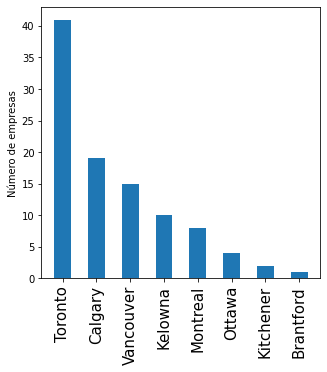

In [546]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

size = 5

labels = tuple(cidades_por_resposta["cidade"].unique())
cidades = cidades_por_resposta["contagem"].tolist()


x = labels#np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

plt.rcParams["figure.figsize"] = (size,size)
fig, ax = plt.subplots()
ax.bar(labels, cidades, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Número de empresas')
#ax.set_xlabel('Número de funcionários/empresa')
#.set_title(str(cidades)+' ')
plt.xticks(rotation=90)
ax.tick_params(axis='x', which='major',labelsize = 15)
ax.set_xticks(labels)
#ax.set_xticklabels(labels)

plt.show()



In [491]:
import time
import json
import requests
geofile = 'toronto_crs84.geojson'

with open(geofile) as json_file:
    geodata = json.load(json_file)

#Convert latitude/longitude to point objects and find out which area they lie in
#The running of this code will take a while (more than 3 hours)

#!pip install tqdm
from tqdm.auto import tqdm, trange

import concurrent.futures
import multiprocessing

import concurrent.futures
import multiprocessing
num_processes = multiprocessing.cpu_count()

from shapely.geometry import shape, Point, Polygon
from shapely.ops import nearest_points
from time import strftime, gmtime
import random


def find_county(lon, lat):
    point = Point(lon, lat)
    found_nhood = 0
    '''Most accidents can be trivially located within a neighbourhood
       using the polygon.contains() function from shapely
    '''
    for i in range(0,len(geodata['features'])):
        polygon = shape(geodata['features'][i]['geometry'])
    if polygon.contains(point):
            nhood = geodata['features'][i]['properties']['AREA_NAME']
            found_nhood = 1
    if found_nhood == 0:
        '''Some accidents can't be located within neighbourhoods because
           they occur on major highways which mark neighbourhood boundaries:
           the "no man's land" problem. Let's deal with these by assigning
           them to the _nearest_ neighbourhood
        '''
        nhoods = []
        distances = np.zeros(len(geodata['features']))
        for i in range(0,len(geodata['features'])):
            polygon = shape(geodata['features'][i]['geometry'])
            distances[i] = point.distance(polygon)
            nhoods.append(geodata['features'][i]['properties']['AREA_NAME'])

        min_distance = np.where(distances == np.amin(distances))
        try:
            #Usually this finds the nearest district
            min_distance_index = int(min_distance[0])
        except:
            '''But sometimes the accident is exactly equidistant between
               two neighbourhood boundaries. In this case, choose one
               of the districts at random to avoid biasing the sample
            '''
            min_distance_index = int(random.choice(min_distance[0]))
        nhood = nhoods[min_distance_index]
        found_nhood = 1
        if found_nhood == 0:
            sys.exit("I'm sorry I can't do that Dave...")
    return nhood

start_time = time.time()

df_vizinhanca = pd.DataFrame()

with concurrent.futures.ProcessPoolExecutor(num_processes) as pool:
    df_vizinhanca["NEIGHBOURHOOD"] = list(tqdm(pool.map(find_county, df_respostas[df_respostas["cidade"]=="Toronto"]['X'], df_respostas[df_respostas["cidade"]=="Toronto"]['Y'], chunksize=10), total=df_respostas[df_respostas["cidade"]=="Toronto"].shape[0]))

elapsed_time = time.time() - start_time
print("Multi-thread elapsed time: "+str(strftime("%H:%M:%S", gmtime(elapsed_time))))

#Saving the processed dataframe
df.to_pickle('processed_df.pkl')

  0%|          | 0/41 [00:00<?, ?it/s]

Multi-thread elapsed time: 00:00:00


In [480]:
import time

In [485]:
df_respostas[df_respostas["cidade"]=="Toronto"]["NEIGHBOURHOOD"]

KeyError: 'NEIGHBOURHOOD'

In [493]:
df_vizinhanca

,NEIGHBOURHOOD
0,Forest Hill South (101)
1,Forest Hill South (101)
2,Forest Hill South (101)
3,Forest Hill South (101)
4,Forest Hill South (101)
5,Forest Hill South (101)
6,Forest Hill South (101)
7,Forest Hill South (101)
8,Forest Hill South (101)
9,Forest Hill South (101)


In [500]:
df_vizinhanca["contagem"] = cidades_por_resposta[cidades_por_resposta['cidade']=='Toronto']["contagem"]
df_vizinhanca

,NEIGHBOURHOOD,contagem
0,Forest Hill South (101),41.0
1,Forest Hill South (101),NaN
2,Forest Hill South (101),NaN
3,Forest Hill South (101),NaN
4,Forest Hill South (101),NaN
5,Forest Hill South (101),NaN
6,Forest Hill South (101),NaN
7,Forest Hill South (101),NaN
8,Forest Hill South (101),NaN
9,Forest Hill South (101),NaN


In [561]:
df_respostas.columns.shape

(7,)

In [566]:
from folium import *

long_medio = df_respostas["X"].mean()
lat_medio = df_respostas["Y"].mean()

print(long_medio)
print(lat_medio)

Toronto = folium.Map(
    location=[lat_medio,long_medio],
    zoom_start=10
)

l = df_respostas

for i in range(len(l)):
    folium.Marker(
        location=[l['Y'].iloc[i], l['X'].iloc[i]],
        icon=folium.Icon(color="blue")
    ).add_to(Toronto)

Toronto

-95.98119430000003
46.7493174


In [516]:
long_medio = df_respostas[df_respostas["cidade"]=="Toronto"]["X"].mean()
lat_medio = df_respostas[df_respostas["cidade"]=="Toronto"]["Y"].mean()

print(long_medio)
print(lat_medio)

Toronto = folium.Map(
    location=[lat_medio,long_medio],
    zoom_start=10
)
Toronto

-79.41629999999999
43.70011


In [520]:
l = df_respostas[df_respostas["cidade"]=="Toronto"]
l.shape

(41, 7)

In [529]:
df_respostas

,tema,nome,cidade,empregados,aporte,X,Y
0,solutions on waste and water,Aqua air 247,Kelowna,0.0,-,-119.48568,49.88307
1,solutions on waste and water,Aqua air 247,Kelowna,1.0,NaN,-119.48568,49.88307
2,solutions on waste and water,Tabl'eau water,Toronto,1.0,NaN,-79.41630,43.70011
3,solutions on waste and water,Fine recycling & disposal ltd,Toronto,1.0,NaN,-79.41630,43.70011
4,solutions on waste and water,Island water technologies,Toronto,1.0,690742.0,-79.41630,43.70011
...,...,...,...,...,...,...,...
95,water resources,Fer-pal infrastructure,Toronto,0.0,-,-79.41630,43.70011
96,water resources,Twothirds water inc.,Vancouver,1.0,NaN,-123.11934,49.24966
97,water resources,Sanzfield technologies,Toronto,1.0,NaN,-79.41630,43.70011
98,water resources,2s water incorporated,Calgary,1.0,NaN,-114.08529,51.05011


In [526]:
l['Y'].loc[2]

43.70011